In [ ]:
# Simple Neural Neuron Example
import numpy as np

# Define input data
x = np.array([0.5, 1.0, -1.5])  # 3 input features
weights = np.array([0.4, 0.7, -0.2])  # weights for each input
bias = 0.5  # bias term

# Step 1: Calculate the weighted sum (z = w.x + b)
z = np.dot(weights, x) + bias
print("Weighted Sum (z):", z)

# Step 2: Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Step 3: Apply activation functions
print("\nActivation Outputs:")
print("Sigmoid:", sigmoid(z))
print("Tanh:", tanh(z))
print("ReLU:", relu(z))


Weighted Sum (z): 1.7

Activation Outputs:
Sigmoid: 0.8455347349164652
Tanh: 0.935409070603099
ReLU: 1.7


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# TensorFlow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model


In [ ]:
import pandas as pd

# Column names
column_names = ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes',
                'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Stress Level'
                , 'Sedentary Hours Per Day', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day'
                , 'Heart Attack Risk']


data = pd.read_csv('/content/sample_data/heart_attack_prediction_dataset.csv',header=0)

# Check first 5 rows
print(data.head())

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income BMI  \
0               0        1        0  ...                        7  261404  31   
1               1        1        1  ...                        5  285768  27   
2               0        0        0  ...                        9  235282  28   
3               1        1        0  ...                        8  125640  36   
4               1        1        1  ...                        2  160555  22   

   Triglycerides  Physical Activity Da

In [ ]:
data.shape

(8763, 26)

In [ ]:
print(data.dtypes)

Patient ID                         object
Age                                 int64
Sex                                object
Cholesterol                         int64
Blood Pressure                     object
Heart Rate                          int64
Diabetes                            int64
Family History                      int64
Smoking                             int64
Obesity                             int64
Alcohol Consumption                 int64
Exercise Hours Per Week             int64
Diet                               object
Previous Heart Problems             int64
Medication Use                      int64
Stress Level                        int64
Sedentary Hours Per Day             int64
Income                              int64
BMI                                 int64
Triglycerides                       int64
Physical Activity Days Per Week     int64
Sleep Hours Per Day                 int64
Country                            object
Continent                         

In [ ]:
X = data[column_names[:-1]] # Features
y = data['Heart Attack Risk']   # Target

In [ ]:
X.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day
0,67,208,72,0,0,1,0,0,4,9,7,31,286,0,6
1,21,389,98,1,1,1,1,1,2,1,5,27,235,1,7
2,21,324,72,1,0,0,0,0,2,9,9,28,587,4,4
3,84,383,73,1,1,1,0,1,10,9,8,36,378,3,4
4,66,318,93,1,1,1,1,0,6,6,2,22,231,1,5


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from keras.layers import Input, Dense

def create_ann_model(activation_hidden='relu', activation_output='sigmoid'):
    model = Sequential()
    model.add(Input(shape=(15,)))
    model.add(Dense(12, activation=activation_hidden))  # first hidden layer
    model.add(Dense(8, activation=activation_hidden))  # second hidden layer
    model.add(Dense(1, activation=activation_output))  # output layer

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [ ]:
# Create model
model = create_ann_model()

# Fit model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6085 - loss: 0.6733 - val_accuracy: 0.6455 - val_loss: 0.6561
Epoch 2/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6519 - loss: 0.6462 - val_accuracy: 0.6448 - val_loss: 0.6546
Epoch 3/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6444 - loss: 0.6503 - val_accuracy: 0.6455 - val_loss: 0.6545
Epoch 4/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6426 - loss: 0.6508 - val_accuracy: 0.6455 - val_loss: 0.6545
Epoch 5/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6438 - loss: 0.6475 - val_accuracy: 0.6462 - val_loss: 0.6543
Epoch 6/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6467 - loss: 0.6459 - val_accuracy: 0.6455 - val_loss: 0.6540
Epoch 7/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6420 - loss: 0.6473 - val_accuracy: 0.6455 - val_loss: 0.6546
Epoch 8/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6461 - loss: 0.6428 - val_accuracy: 0.

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predict and classification report
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6350 - loss: 0.6616
Test Accuracy: 63.61%
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[1081   44]
 [ 594   34]]
              precision    recall  f1-score   support

           0       0.65      0.96      0.77      1125
           1       0.44      0.05      0.10       628

    accuracy                           0.64      1753
   macro avg       0.54      0.51      0.43      1753
weighted avg       0.57      0.64      0.53      1753



In [ ]:
for epochs in [50, 100]:
    for batch_size in [5, 10, 20]:
        model = create_ann_model()
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print(f"Epochs: {epochs}, Batch size: {batch_size}, Test Accuracy: {accuracy*100:.2f}%")


Epochs: 50, Batch size: 5, Test Accuracy: 59.61%
Epochs: 50, Batch size: 10, Test Accuracy: 60.24%
Epochs: 50, Batch size: 20, Test Accuracy: 62.92%
Epochs: 100, Batch size: 5, Test Accuracy: 61.10%
Epochs: 100, Batch size: 10, Test Accuracy: 60.58%
Epochs: 100, Batch size: 20, Test Accuracy: 62.24%


In [ ]:
activations = ['relu', 'tanh', 'sigmoid']

for act in activations:
    model = create_ann_model(activation_hidden=act)
    history = model.fit(X_train, y_train, epochs=30, batch_size=10, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Hidden Activation: {act}, Test Accuracy: {accuracy*100:.2f}%")


Hidden Activation: relu, Test Accuracy: 59.44%
Hidden Activation: tanh, Test Accuracy: 63.26%
Hidden Activation: sigmoid, Test Accuracy: 64.18%


In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


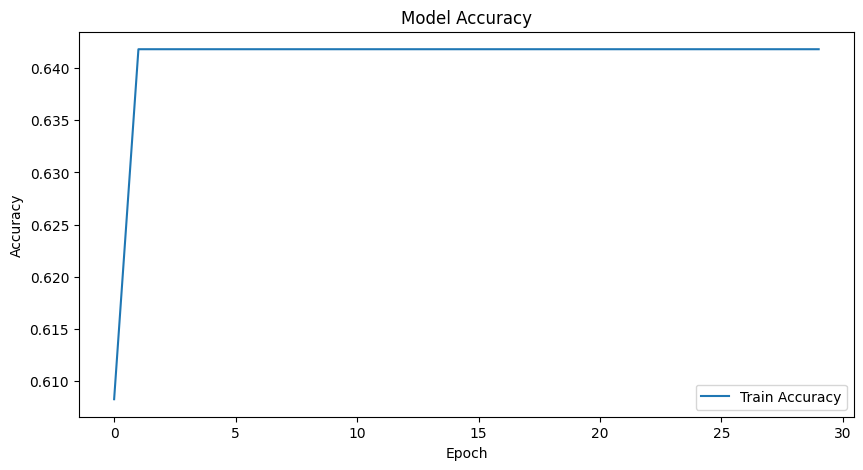

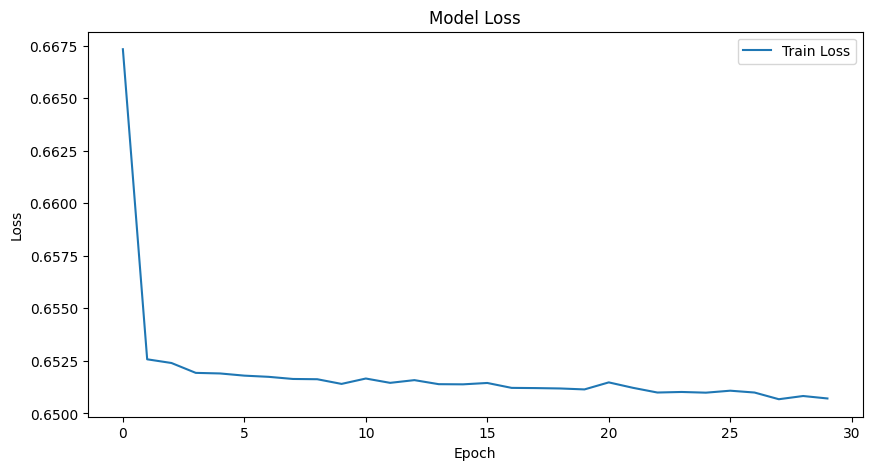

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


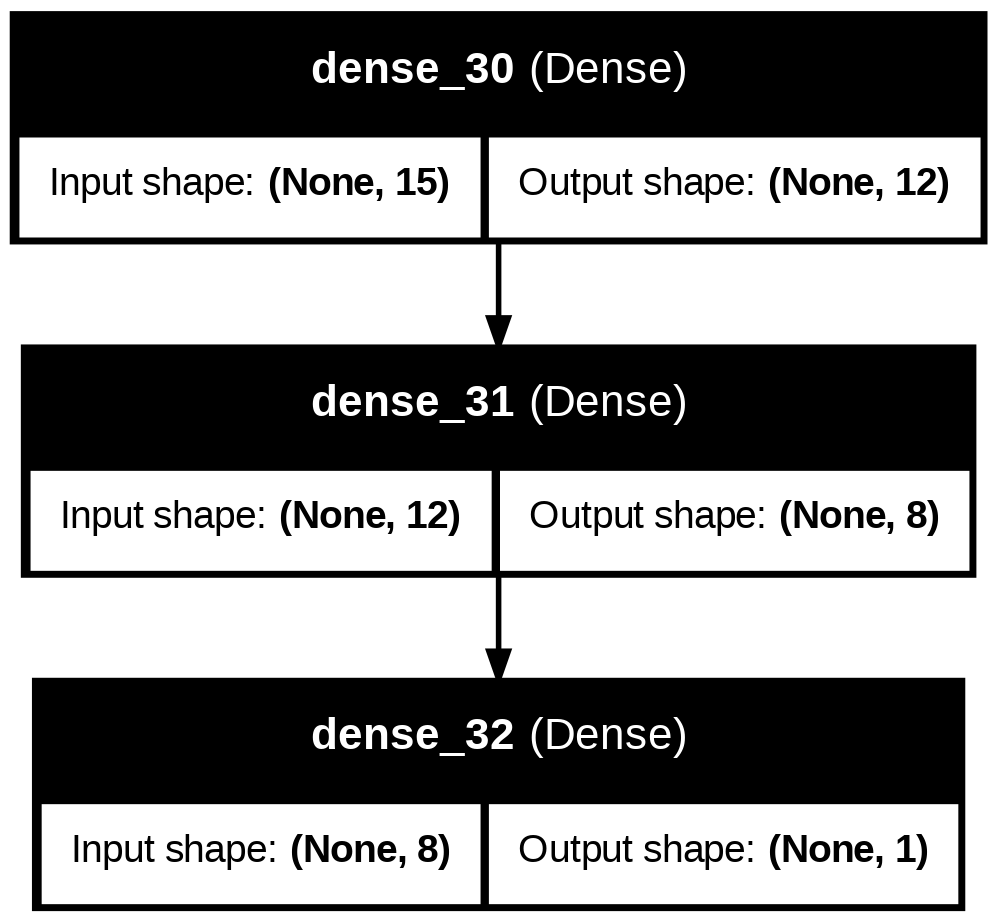

In [ ]:
plot_model(model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)


Dataset loaded successfully!
  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income BMI  \
0               0        1        0  ...                        7  261404  31   
1               1        1        1  ...                        5  285768  27   
2               0        0        0  ...                        9  235282  28   
3               1        1        0  ...                        8  125640  36   
4               1        1        1  ...                        2  160555  22   

   Trigly

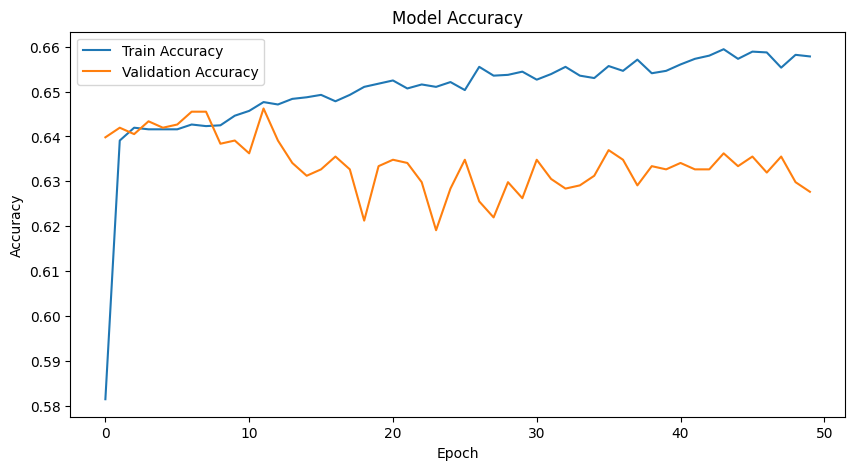

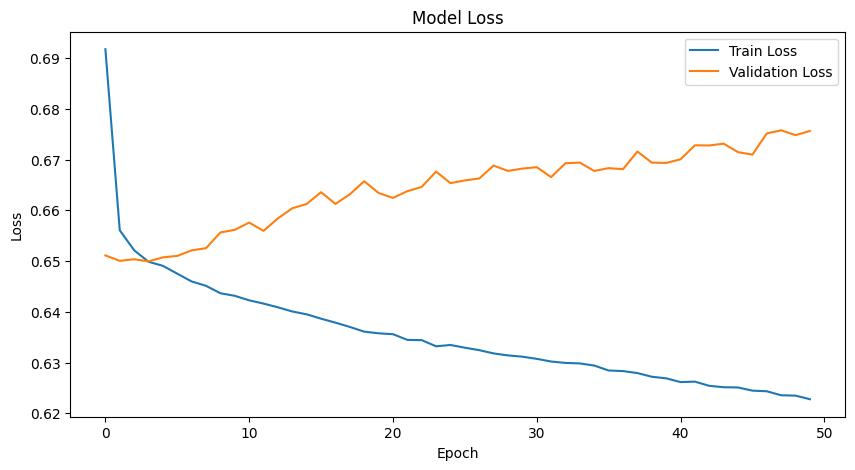


Model architecture saved as 'ann_model.png'.


In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# 2. Load Dataset Correctly
column_names = ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes',
                'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Stress Level'
                , 'Sedentary Hours Per Day', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day'
                , 'Heart Attack Risk']

data = pd.read_csv('/content/sample_data/heart_attack_prediction_dataset.csv',header=0)


print("Dataset loaded successfully!")
print(data.head())

X = data[column_names[:-1]] # Features
y = data['Heart Attack Risk']   # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Define ANN Model
def create_ann_model(activation_hidden='relu', activation_output='sigmoid'):
    model = Sequential()
    model.add(Input(shape=(15,)))
    model.add(Dense(12, activation=activation_hidden))  # first hidden layer
    model.add(Dense(8, activation=activation_hidden))  # second hidden layer
    model.add(Dense(1, activation=activation_output))  # output layer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 5. Create and Train the Model
model = create_ann_model()
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=10,
    validation_split=0.2,  # Important for val_accuracy
    verbose=1
)

# 6. Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. Plot Training History
# Accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 8. Visualize Model Architecture
plot_model(model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)
print("\nModel architecture saved as 'ann_model.png'.")
